# Veri Bilimi İçin İstatistik

- Örnek Teorisi
- Betimsel İstatistikler
- Güven Aralıkları
- Olasılık Dağılımları
- Hipotez Testleri
- Varyans Analizi
- Korelasyon Analizi

## Örnek Teorisi

<p>Örneklem, bir popülasyon (ana kitle) içerisinden bu popülasyonu iyi bir şekilde (yansız) temsil ettiği düşünülen bir alt kümedir.</p>
Örneklem dağılımı, bir popülasyondan birden fazla örneklem çekip, bu örneklemlerin dağılımlarını incelediğimizde ortaya çıkan durumdur.

In [1]:
import numpy as np

In [2]:
populasyon=np.random.randint(0,90,10000)

In [3]:
populasyon[0:10]

array([30, 30, 80, 21, 82, 13, 59, 71,  6, 50])

In [4]:
# örneklem çekimi
np.random.seed(1) # random_state ile aynı işlevi görür.
orneklem=np.random.choice(a=populasyon,size=100) # populasyon içerisinden 100 tane rastgele örneklem seç
orneklem[:10]

array([ 1, 65, 36, 26, 27, 66, 75, 76, 48,  1])

In [5]:
orneklem.mean(),populasyon.mean()

(49.02, 44.4599)

In [6]:
# örneklem dağılımı
np.random.seed(15)
orneklem1=np.random.choice(a=populasyon,size=100)
orneklem2=np.random.choice(a=populasyon,size=100)
orneklem3=np.random.choice(a=populasyon,size=100)
orneklem4=np.random.choice(a=populasyon,size=100)
orneklem5=np.random.choice(a=populasyon,size=100)
orneklem6=np.random.choice(a=populasyon,size=100)
orneklem7=np.random.choice(a=populasyon,size=100)
orneklem8=np.random.choice(a=populasyon,size=100)
orneklem9=np.random.choice(a=populasyon,size=100)
orneklem10=np.random.choice(a=populasyon,size=100)

In [7]:
# Merkezi Limit Teoremi
# oluşturulan yeni örneklemlerin ortalamalarının aritmetik ortalaması
(orneklem1.mean()+orneklem2.mean()+orneklem3.mean()+orneklem4.mean()+orneklem5.mean()+orneklem6.mean()+orneklem7.mean()\
+orneklem8.mean()+orneklem9.mean()+orneklem10.mean())/10

44.01800000000001

## Betimsel İstatistikler

<p>Kovaryans, iki değişken arasındaki ilişkinin değişkenlik ölçüsüdür.</p>
<p>Varyans, ortalama etrafındaki dağılımın ölçüsüdür. Standart sapmanın karesidir.</p>
<p>Korelasyon, iki değişken arasındaki ilişkiyi, ilişkinin anlamını, ilişkinin şiddetini ve yönünü ifade eder.</p>

In [8]:
import seaborn as sns
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Yukarıda yaptığımız istatiksiksel işlemleri aşağıdaki <b>researchpy</b> modülü ile de yapabiliriz.

In [10]:
import researchpy as rp

In [11]:
rp.summary_cont(df[["total_bill","tip","size"]]) # sürekli değişkenler için istatistik özellikler.
# SD: standart sapma, SE: standart hatası, Conf: %95 doğruluk ile Güven aralıklıkları

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [12]:
rp.summary_cat(df[["sex","smoker","day"]]) # kategorik değişkenler için istatistik özellikler

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [13]:
# kovaryans
df[['tip','total_bill']].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [14]:
# korelasyon
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


## Güven Aralıkları

<p> Örnek istatistiğinin iki sayı tarafından bir aralık olarak ifade edilmesidir.</p>
<p> Yani, ortalamanın etrafında artı-eksi bir değer konumlandırması yap demektir.</p>
<p> Örnek sayısı, ortalama, standart sapma ve z tablo değerleri kullanılarak hesaplanır.</p>

In [15]:
import math

In [16]:
ortalama=orneklem.mean()
n=100
std=orneklem.std()
z_tablo=1.5 # normalde tablodan bakılıp yazılması gereken bir değer bu örnek için öylesine yazılmıştır.

In [17]:
# örneklemler, istastiki olarak %95 güvenilirlik ile değerlerin aralıkları hesaplandı.
("mean:",ortalama), ("alt sınır:",ortalama-(z_tablo*std/math.sqrt(n))),("üst sınır:",ortalama+(z_tablo*std/math.sqrt(n)))

(('mean:', 49.02),
 ('alt sınır:', 45.060796671046056),
 ('üst sınır:', 52.97920332895395))

Yukarıdaki işlemin daha kesin ve doğru sonucu için aşağıda <b>statsmodels </b> modülünü import ederek uygulayalım

In [18]:
import statsmodels.stats.api as sms

In [19]:
# orneklemi vermemiz yeterlidir.istastiki olarak %95 güvenilirlik ile değerlerin aralıkları hesaplandı.
sms.DescrStatsW(orneklem).tconfint_mean()

(43.75633664988797, 54.283663350112036)

<p> Güven aralığı için bir başka örnek:</p>
<p> Bir ürünümüz olduğunu ve bu ürünün fiyatını belirlemek için insanlara anlatıp daha sonra bu ürün için ne kadar teklif verebileceklerini sorduğumuzu düşünelim. Gelen değerler tamamen birbirinden bağımsız olacaktır. Bu adımlara göre ürünümüze bir fiyat belirlemek için gelen değerlerin ortalamasını alabiliriz. Fakat bunu daha da ileriye taşıyarak kimi durumlarda biraz ucuza, kimi durumlarda daha pahalıya satabilmek ve en yüsek kârı sağlayabilmek için; bilimsel ve istatistiki olarak %95 güvenirlik ile 2 ara değer hesaplanması yapılabilir. Bu bir güven aralığı problemi sayılabilecek bir konudur. Ve ürünün bu aralıklar sayesinde elde edeceği kar artışı %1 %2 bile arttsa bu çok önemli ve gerçek hayatta da kıymetli bir süreçtir.</p>

In [20]:
fiyatlar=np.random.randint(10,120,1000)
fiyatlar.mean()

64.233

In [21]:
sms.DescrStatsW(fiyatlar).tconfint_mean()
# hesaplanan bu aralıklar ile ürünümüzün pazarlama esnekliğini sağlamış olup
# 100 kişiden 95 i ürünün fiyatı bu aralıklardayken bu ürünü alır diyebilmiş oluyoruz.

(62.298044753347504, 66.16795524665251)

## Olasılık Dağılımları

<p>Olasılık, olayların olabilirliğinin sayısal ifadesidir. Ya da bir olayın meydana gelmesi için uygun durum sayısının, o konuda oluşabilecek tüm elverişli durum sayısına oranıdır.</p>
<p>Rassal değişken, değerlerini bir deneyin sonucundan alan değişkenlere denir. Örneğin; yazı tura deneyi.</p>
<p>Dağılım, evrende gelişen bütün olayların sayısal karşılıklarının ortaya çıkardığı yapıya denir.</p>
<p>Olasılıksal dağılım, rassal yapıya ait değerler ve bu değerlerin gerçekleşme olasılıklarının bir arada ifade edilmesine denir. </p>
<p>Olasılık fonksiyonu, bir değişkenin herhangi bir değişkeni alması olasılığını hesaplayan fonksiyondur.</p>

<p>Olasılık dağılımları bir veri bilimci olarak bizim ne işimize yarar?</p>

- Belirsizlik atında karar vermeyi kolaylaştırır. Bir şeyleri modellemek, veriye dökmeye çalışmak adına yapılabilinecek yaklaşımlardan birisi olasılık dağılımlarını kullanmaktır.
- Uygun olasılık fonksiyonları ile olasılık hesapları yapılabilinir.

Kesikli olasılık dağılımları
- Bernouilli
- Binom
- Poisson
----------------------------------------------
Sürekli olasılık dağılımları
- Normal Dağılım
- Üniform Dağılım
- Üstel Dağılım

### Bernouilli Dağılımı

Başarılı-başarısız, olumlu-olumsuz şeklindeki iki sonuçlu olaylarda kullanılan kesikli olasılık dağılımıdır.

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$

Ortalama (Beklenen değer): ${\displaystyle \operatorname {E} \left(X\right)=p}$

Varyans: $\operatorname {Var} [X]=pq=p(1-p)$


In [22]:
# olasılık dağılımları işlemleri için scipy modülü kullanılacak.
from scipy.stats import bernoulli

In [23]:
# iki sonuçlu bir olayın, bir tanesinin gerçekleşmesi olasılığı 0.6 olarak belirledik.
p = 0.6

In [24]:
rv=bernoulli(p)
rv.pmf(k=0) ,rv.pmf(k=1) # iki sonuçlu durumlardan her birinin gerçekleşme olasılığını hesaplar.
# pmf -> probability mass function -> olasılık kütle fonksiyonu

(0.4, 0.6)

### Büyük Sayılar Yasası

Bir rassal değişkenin <b>uzun vadeli</b> kararlılığını tanımlayan olasılık teoremidir.
<p> Örnek olması açısından yazı-tura olasılığının deney sayısı arttıkça %50 ihtimale yaklaştığını gözlemleyelim </p>

In [25]:
rng=np.random.RandomState(1) # her seferinde aynı örneklerle çalışmak için
for i in np.arange(1,21):
    deney_sayisi=2**i
    yazi_tura=rng.randint(0,2,size=deney_sayisi)
    yazi_olasiligi=np.mean(yazi_tura)
    print("Atış sayısı:",deney_sayisi,"---","Yazı olasılığı: %.2f"%(yazi_olasiligi*100))

Atış sayısı: 2 --- Yazı olasılığı: 100.00
Atış sayısı: 4 --- Yazı olasılığı: 50.00
Atış sayısı: 8 --- Yazı olasılığı: 62.50
Atış sayısı: 16 --- Yazı olasılığı: 31.25
Atış sayısı: 32 --- Yazı olasılığı: 59.38
Atış sayısı: 64 --- Yazı olasılığı: 57.81
Atış sayısı: 128 --- Yazı olasılığı: 49.22
Atış sayısı: 256 --- Yazı olasılığı: 46.09
Atış sayısı: 512 --- Yazı olasılığı: 46.88
Atış sayısı: 1024 --- Yazı olasılığı: 49.32
Atış sayısı: 2048 --- Yazı olasılığı: 50.24
Atış sayısı: 4096 --- Yazı olasılığı: 49.95
Atış sayısı: 8192 --- Yazı olasılığı: 49.65
Atış sayısı: 16384 --- Yazı olasılığı: 50.20
Atış sayısı: 32768 --- Yazı olasılığı: 50.11
Atış sayısı: 65536 --- Yazı olasılığı: 49.66
Atış sayısı: 131072 --- Yazı olasılığı: 50.01
Atış sayısı: 262144 --- Yazı olasılığı: 50.18
Atış sayısı: 524288 --- Yazı olasılığı: 49.95
Atış sayısı: 1048576 --- Yazı olasılığı: 50.00


### Binom Dağılımı

Binom dağılımı, bağımsız n deneme sonucu k başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır.
<p> Bernouilli dağılımının n defa gerçekleştirilmiş versiyonudur. </p>

${\displaystyle f(x;n,p)=\binom{n}{x} p^{x}(1-p)^{n-x}\quad {\text{, }}x = \{0,1,2,...,n\}}$

Ortalama (Beklenen değer): ${\displaystyle \operatorname {E} \left(X\right)=np}$

Varyans: $\operatorname {Var} [X]=np(1-p)$

--------------------------------------------------
Formüllere göre;
<p> Bir madeni para 4 kere atılıyor. 2 kere yazı gelmesi olasılığı nedir ? </p>

${\displaystyle f(2;4,0.50)=\binom{4}{2} 0.50^{2}(1-0.50)^{4-2}\quad=0.375}$

-------------------------
Problem:
- <p> Çeşitli mecralarda reklam veriliyor, reklamların tıklanma ve geri dönüşüm oranları optimize edilmeye çalışılıyor. Buna yönelik olarak belirli bir mecrada çeşitli senaryolara göre reklama tıklama olasılıkları hesaplanmak isteniliyor. </p>

Detaylar:
- Bir mecrada reklam verilecek.
- Dağılım ve reklama tıklanma olasılığı biliniyor (0.01).
- <b> Soru: </b> Reklamı 100 kişi gördüğünde 1,5,10 tıklanma olasılıkları nelerdir?

In [26]:
from scipy.stats import binom

In [27]:
p=0.01
n=100
rv=binom(n,p)
print("1 tıklanma olasılığı:",rv.pmf(1)) # pmf: olasılık kütle fonksiyonu
print("5 tıklanma olasılığı:",rv.pmf(5))
print("10 tıklanma olasılığı:",rv.pmf(10))

1 tıklanma olasılığı: 0.36972963764971983
5 tıklanma olasılığı: 0.0028977871237616114
10 tıklanma olasılığı: 7.006035693977161e-08


### Poisson Dağılımı

Belirli bir zaman aralığında, belirli bir alanda <b>nadiren</b> rastlanan olayların olasılıklarını hesaplamak için kullanılır.
<p> Poisson dağılımı, binom dağılımının özel bir halidir. </p> 
n: büyük, p: küçük olması beklenmektedir.

Bir olayın nadir kabul edilebilmesi için; 
- n>50 olması,
- 𝜆(n*p)<5 kabulüne dayanmaktadır.


${\displaystyle  f(x,\lambda)=\dfrac{\lambda^{x}(e)^{-\lambda}}{x!}\quad, {\text{}}x=0,1,2,...,n}$

Varyans: $\operatorname {Var} [X]=\lambda$ 

Ortalama (Beklenen değer): ${\displaystyle \operatorname {E} \left(X\right)=\lambda}$

-----
Poisson dağılımı nadire denilebilinecek olayların gerçekleşme olasılığı ile ilgilendiğinden bunlara birkaç örnek verelim.
- 10.000 kelimeden oluşan bir kitapta hatalı kelime sayısı
- 4000 öğrencili okulda not girişinde hata yapılması
- Kredi kartı işlemlerinde sahtekarlık olması
- Rötara düşen uçuş sefer sayısı

-------------
Problem:
- Bir şirket, kullanıcılarına web üzerinden bir ilan yayınlama hizmeti vermektedir. Yayınlanan ilanlar arasından hatalı ilan girşi olasılıkları hesaplanmak isteniliyor.

Detaylar
- Bir yıl süresince ölçümler yapılıyor.
- Dağılım biliniyor (Poisson) ve Lambda 0.1 (ortalama hata sayısı).
- Hiç hatalı ilan olmaması, 3 hatalı ilan olması ve 5 hatalı ilan olması olasılıkları nelerdir?

In [28]:
from scipy.stats import poisson

In [29]:
lambda_=0.1

In [30]:
rv=poisson(mu = lambda_)
print("0 hatalı ilan yayınlanma olasılığı:",rv.pmf(1)) # pmf: olasılık kütle fonksiyonu
print("3 hatalı ilan yayınlanma olasılığı:",rv.pmf(3))
print("5 hatalı ilan yayınlanma olasılığı:",rv.pmf(5))

0 hatalı ilan yayınlanma olasılığı: 0.09048374180359597
3 hatalı ilan yayınlanma olasılığı: 0.00015080623633932676
5 hatalı ilan yayınlanma olasılığı: 7.54031181696634e-08


### Normal Dağılım

Normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplaması için kullanılır.

${\displaystyle  f(x|\mu,\sigma ^{2})=\dfrac{1}{\sqrt{2\pi\sigma ^{2}}}e^{-\dfrac{(x-\mu)^{2}}{2\sigma ^{2}}}}$

Varyans: $\operatorname {Var} [X]=\sigma ^{2} $ 

Ortalama (Beklenen değer): ${\displaystyle \operatorname {E} \left(X\right)=\mu}$

-------
Problem:
- Bir toplantı öncesinde gelecek ayla ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor.

Detaylar:
- Dağılımın normal olduğu biliniyor.
- Aylık ortalama satış sayısı 80K, standart sapması 5K
- 90K'dan fazla satış yapılması olasılığı nedir?

Bakıldığı zaman aslında şunu görüyor olmamız lazım; ortalama değerimiz 80k, standart sapma değerimiz ise 5k'dır. Ortalama üzerine standart sapmayı eklediğimizde 85k, çıkarttığımızda 75k olmaktadır. Yani satışların bu iki aralıkta olma olasılığı yüksektir. Buradan yola çıkarak 90K'dan fazla satış yapılması olasılığının düşük olabileceğini ön görebiliriz.

In [31]:
from scipy.stats import norm

In [32]:
mu=80
std=5

In [33]:
# 90K'dan fazla satış yapılması olasılığı
1-norm.cdf(90,80,5) # kümülatif yoğunluk fonksiyonu
# 1'den çıkartmamızın sebebi yoğunluk fonksiyonu alanından 90'dan büyük alanına baktığımız içindir.

0.02275013194817921

In [34]:
# 70K'dan fazla satış yapılması olasılığı
1-norm.cdf(70,80,5) # kümülatif yoğunluk fonksiyonu

0.9772498680518208

In [35]:
# 73K'dan az satış yapılması olasılığı
norm.cdf(73,80,5) # kümülatif yoğunluk fonksiyonu
# Burada ise az olması olasılığı istendiği için 1'den çıkartmaya gerek yoktur.

0.08075665923377107

In [36]:
# 85K ile 90K arasında satış yapılması olasılığı
norm.cdf(90,80,5) - norm.cdf(85,80,5) # kümülatif yoğunluk fonksiyonu
# integral alanı hesabı gibi (taralı alan).

0.13590512198327787

## Hipotez Testleri

Hipotez, bir savı, inanışı, tahmini test etmek için kullanılan istatiksel bir tekniktir.

<p> Hipotez türleri: </p>

- Ho:mü=50, Hı:mü!=50
- Ho:mü<=50, Hı:mü>50
- Ho:mü>=50, Hı:mü<50

Maddelerde görüldüğü üzere, Ho hipotezi bizim asıl hipotemiz ise Hı hipotezi alternatif hipotezimiz olacaktır.

### Hipotez Testi Adımları
- Hipotezlerin kurulması ve yönlerinin belirlenmesi (Ho ve Hı hipotezlerinin kurulması)
- Anlamlılık düzeyinin ve tablo değerinin belirlenmesi (alfa = 0.05)
- Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması
- Hesaplanan test istatistiği ile alfa'ya karşılık gelen tablo değerinin karşılaştırılması (2.adım ve 3.adımdaki değerlerin karşılaştırılması)
    - Test istatistiği(Zh) > Tablo değeri (Zt) ise Ho Reddedilir.
- Yorumlama

### Tek Örneklem T Testi
<p>Popülasyon ortalaması ile varsayımsal bir değer arasında istatistiksel olarak anlamlı bir farklılık olup olmadığını test etmek için kullanılan parametrik bir testtir. </p>
<p> 10.000 kişilik bir ilçeden çekilen 100 örneğe tek örnek denir. Bu örnek üzerinden anakitleye yani popülasyon ortalamasına ilişkin bir değerlendirmede bulunulacaksa tek örneklem t testi kullanılmalıdır. </p>
<p>Özetle T testi, elimizde tek bir örneklemin ortalamasına ilişkin test yapma ihtiyacı olduğunda kullanılan testtir (Bir ilçenin yaş ortalaması, kullanıcıların web sayfasında geçirdiği süre gibi). </p>

<p>Hipotez testi adımlarına göre:</p>

<b>Hipotezler</b>
- Ho:mü=50, Hı:mü!=50
- Ho:mü<=50, Hı:mü>50
- Ho:mü>=50, Hı:mü<50

<b>Test istatistiği</b>

T tablosu için: ${\displaystyle  t=\dfrac{x ̅-\mu}{\dfrac{s}{\sqrt{n}}}}$, Z tablosu için: ${\displaystyle  z=\dfrac{x ̅-\mu}{\dfrac{\sigma}{\sqrt{n}}}}$

Tek örneklem t testinde, test istatiğine karar vermek için yapılacak olan seçimler:

- Anakütle standart sapması biliniyorsa z istatistiği kullanılır.
- Anakütle standart sapması bilinmiyorsa ve n>30 ise z istatistiği kullanılır.
- Anakütle standart sapması bilinmiyor ve n<30 ise t istatistiği kullanılır.

Veri bilimi kapsamında genelde n (örnek sayısı) > 30 olacağından dolayı ve örnek sayısı arttıkça t dağılımı, z dağılımına yaklaşacağından dolayı genelde t üzerinden işlemler yapılacaktır.

<b>Varsayımlar</b>

Hipotez testlerinde varsayımlar test edilmelidir. Eğer varsayım sağlanırsa ilgili hipotez testi kullanılabilir, sağlanmıyorsa Nan-parametrik hipotez testleri ele alınır. Gerçek verilerde ve çalışmalarda da genelde Nan-parametrik durumlar söz konusu olmaktadır.  

--------------------------
<b>İş Uygulaması Problemi</b>

Problem:
- Sepete ürün ekleme işlemi sonrasında ödeme ekranında 5 adım vardır ve bu adımların birisi sorgulanmaktadır (Sepete ürün ekle, fatura bilgisini gir, adresi gir gibi adımlar). 

Detaylar:
- Her adımın 20'şer saniye olması hedefi vardır ve buna göre 4.adım sorgulanıyor.
- Bu durumu test etmek için 100 örnek alınıyor.
- Örnek standart sapması 5 saniye, ortalaması ise 19 saniye bulunuyor.

Yani
- Örnek üzerinden bulunan ortalama=19, Sınamış olduğumuz hipotezdeki değer 𝜇=20, Örneği ifade eden standrat sapma(s) 𝜎=5, Örnek sayımız(n)=100

Şimdi problemi hipotez testi adımlarına göre bir iş uygulamasına entegre edelim

<b>İş Uygulaması</b>
- <b>Adım 1:</b> Hiptezlerin kurulması ve yönlerinin belirlenmesi
    - Ho:mü=20 (Bilinmeyen anakütle parametresi mü, yani kişilerin 4.adımda geçirmiş oldukları süre ortalaması 20 saniyedir demektir.)
    - Hı:mü!=20 (Bilinmeyen anakütle parametresi mü, yani kişilerin 4.adımda geçirmiş oldukları süre ortalaması 20 saniyeden farklıdır demektir.)
    
- <b>Adım 2:</b> Anlamlılık düzeyinin ve tablo değerinin belirlenmesi
    - Anlamlılık düzeyi yani alfa; kabul edilebilir hata miktarı = 0,05
    - Alternatif hiptez iki yönlü olduğundan dolayı alfa/2 = 0,025
    - Alternatif hiptez büyüktür ya da küçüktür şeklinde tek yönlü olsaydı, bu durumda alfayı olduğu gibi kabul edip, bu alfa değerine karşılık gelen tablo değerine bakılacaktı.
    - Z tablo olasılık değeri: 0,5 - 0.025 = 0,475
    - Yukarıda bulunan değerin (0,475) z tablosundaki değeri = -/+ 1,96
    
- <b>Adım 3:</b> Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması
    - Bu örnekte n>30 olduğu için z tablosuna göre hesaplama yapıyoruz: ${\displaystyle  z=\dfrac{x ̅-\mu}{\dfrac{\sigma}{\sqrt{n}}}}$
    - ${\displaystyle  z=\dfrac{19-20}{\dfrac{5}{\sqrt{100}}} = -2,00}$

- <b>Adım 4:</b> Hesaplanan test istatistiği ile alfa'ya karşılık gelen tablo değerinin karşılaştırılması (2.adım ve 3.adımdaki değerlerin karşılaştırılması)
    - Zhesap = -2,00 ve Ztablo = -1,96
    - Zh > Zt veya -Zh < -Zt ise Ho reddedilir.
    - -2,00 < -1,96 olduğu için Ho reddedilir.

- <b>Adım 5:</b> Yorumlama
    - Ho:mü=20 
    - Hı:mü!=20
    - 4.adımda geçirilen sürenin 20 saniye olduğunu iddia eden Ho hipotezi reddedilmiştir. Buna göre kullanıcılar istatistiksel olarak %95 güvenilirlik ile 4. adımda 20 saniyeden farklı zaman geçirmektedir.
    
Bu değerlendirme sonucu şirket sonuçlara göre, gerekli kararları alarak müşterilerine hizmet sunabilir.

<b>İş Uygulaması Problemi 2</b>

Problem:
- Web sitesinde geçirilen ortalama süre 170 saniye mi?

Detaylar:
- Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler bulunmakta.
- Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.

Hipotezler:
- Ho: mü=170
- Hı: mü!=170

In [37]:
olcumler=np.array([17,160,234,149,145,107,195,75,100,60,215,205,123,145,155,127,244,163,114,145,65,112,185,202,164,206,244,\
                  188,156,187,154,177,95,170,50,110,306,110,171,166,135,155,126,84,251,173,131,207,135,86])

In [38]:
import scipy.stats as stats

In [39]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 306), mean=151.58, variance=3216.1261224489795, skewness=0.141025415593888, kurtosis=0.1906040993242577)

In [40]:
# Varsayım Kontrolü
# normallik varsayımı

Normallik varsayımına bakmadan Tek Örneklem testini uygulamıyoruz. Bu yüzden önce grafiksel olarak daha sonra ise nümerik olarak normallik varsayımını bakar, normallik sağlanıyorsa teste devam ederiz.

Bunun içinde hipotez kuracak olursak asıl hipotezimizin alt bir hipotezi normalliği kontrol etmektedir.

Ho: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.

Hı: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır.

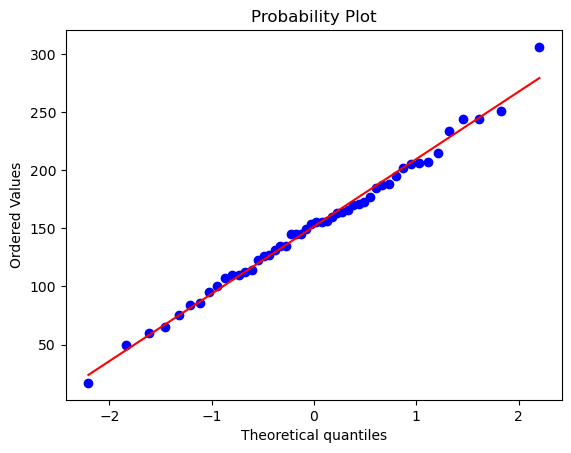

In [41]:
# grafiksel bakış
# qqplot
import pylab
stats.probplot(olcumler,dist="norm",plot=pylab)
pylab.show()

In [42]:
# nümerik bakış
# Shapiro-Wilks Testi

In [43]:
from scipy.stats import shapiro

In [44]:
shapiro(olcumler)

ShapiroResult(statistic=0.9941518306732178, pvalue=0.9970465898513794)

P-value > alfa (0.05) olduğu için, Ho hipotezi reddedilemez. Yani artık Parametrik Tek Örneklem T Testini uygulayabiliriz.

In [45]:
# Hipotez Testi Uygulanması
# Parametrik Tek Örneklem T Testi

In [46]:
stats.ttest_1samp(olcumler,popmean=170)

Ttest_1sampResult(statistic=-2.2967202113850647, pvalue=0.025948662777607975)

Ho: Web sitesinde geçirilen ortalama süre 170 saniyedir.

Hı: Web sitesinde geçirilen ortalama süre 170 saniyeden farklıdır.

p-value(0.0259)< alfa(0.05) olduğundan dolayı, Ho hipotezi reddedilir. Yani web sitesinde geçirilen ortalama süre 170 değildir.

In [47]:
# Nonparametrik Tek Örneklem Testi
# eğer yukarıdaki varsayım hipotezini reddetseydik, dağılım normal olmasaydı,
# yani; Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık olsaydı
# Nonparametrik Tek Örneklem Testini uygulayacaktık. Yine de lazım olması ve öğrenilmesi açısından nasıl kurulduğunu görelim.

In [48]:
from statsmodels.stats.descriptivestats import sign_test

In [49]:
sign_test(olcumler) 

(25.0, 1.7763568394002505e-15)

### Tek Örneklem Oran Testi
Oransal bir ifade test edilmek istenildiğinde kullanılır. Mantık olarak Tek Örneklem T Testine benzerdir fakat ilgilenilen ifade burada oransal bir ifadedir.

Burada kullanılan test istatistiği:

${\displaystyle  z=\dfrac{p^ş-p0}{\sqrt{\dfrac{p0(1-po)}{n}}}}$

${\displaystyle p^ş}$: Örnek üzerinden elde edilen değer.

p0: sınanmak istenen değer.

Varsayım:

n>30 olduğu sürece bu test uygulanabilir.

----------------

<b>İş Uygulaması Problemi (Dönüşüm Oranı Testi)</b>

Dönüşüm oranı, potansiyel müşterilerin veya ürünü inceleyen kişilerin, ürün sahibi kişilere yani müşterilere dönüşme oranıdır. Yani bir sitedeki ürün reklamını 100 görmüş ve içlerinden sadece 5 kişi almış ise dönüşüm oranı 0.05'tir.

Problem:
- Bir yazılım ile bir mecrada reklam verilmiş bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde edildiği ifade edilmiş. Bu durum kontrol edilmek isteniyor. Çünkü bu yüksek bir oran ve gelirler incelendiğinde örtüşmüyor.

Detaylar:
- 500 kişi dış mecrada reklamlara tıklamış, 40 tanesi siteye girip alışveirş yapmış.
- Örnek üzerinden elde edilen dönüşüm oranı: 40/500 = 0,08

Hipotezler:
- Ho:P=0.125
- Hı:P!=0.125

In [50]:
from statsmodels.stats.proportion import proportions_ztest

In [51]:
count=40 # başarı sayısı
nobs=500 # gözlem sayısı
value=0.125 # test etmek istenen değer

In [52]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

Görüldüğü üzere p-value değeri(0.0002), çalışmanın başında kabul edilebilir hata miktarı olan alfa'dan(0.05) küçük olduğu için Ho hipotezi reddedilir.

### Bağımsız İki Örneklem T Testi (AB TESTİ)
İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

Hipotezler:
- Ho: mü1=mü2 - Hı:mü1!=mü2
- Ho: mü1>=mü2 - Hı:mü1<mü2
- Ho: mü1<=mü2 - Hı:mü1!>mü2

Test İstatistiği:
- Örneklem sayıları aynı, varyanslar homojen ise:
    - ${\displaystyle  t=\dfrac{X1 ̅- X2 ̅}{Sp\sqrt{\dfrac{2}{n}}}}$, ---    ${\displaystyle  Sp=\sqrt{\dfrac{s^2 x1+ s^2 x2}{2}}}$ 
- Örnek sayısı farklı, varyanslar homojen ise:
    - ${\displaystyle  t=\dfrac{X1 ̅- X2 ̅}{Sp\sqrt{\dfrac{1}{n1}+\dfrac{1}{n2}}}}$, --- ${\displaystyle  Sp=\sqrt{\dfrac{(n1-1)s^2 x1+ (n2-1) s^2 x2}{n1+n2-2}}}$ 
- Örnek sayıları farklı, varyanslar homojen değilse (Welch testi):
    - ${\displaystyle  t=\dfrac{X1 ̅- X2 ̅}{Sdelta}}$, --- ${\displaystyle  Sdelta=\sqrt{\dfrac{s1^2}{n1}+\dfrac{s2^2}{n2}}}$ 

Varsayımlar:
- Normallik (görsel: qqplot, hipotez testi: shapiro wilk testi)
- Varyans Homojenliği (İki grubunda varyanslarının birbirine olan benzerliği)

-----------

<b>İş Uygulaması Problemi: ML Modelinin Başarı Testi (AB Testi)</b>

Problem:
- Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırlıp anlamlı farklılık olup olmadığı test edilmek isteniyor. A eski sistemi, B makine öğrenmesi modeline sahip yeni sistemi ifade ediyor.

Detaylar:
- Model geliştirilmiş ve web sitesine entegre edilmiş.
- Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun.
- A grubu eski, B grubu yeni sistem.
- Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

Hipotezler:
- Ho:mü1=mü2 (eski sistemin gelirlerinin ortalaması ve yeni sistemin gelirlerinin ortalaması birbirine eşittir.)
- Hı:mü1!=mü2 (eski sistemin gelirlerinin ortalaması ve yeni sistemin gelirlerinin ortalaması birbirine eşit değildir.)

In [53]:
import pandas as pd

In [54]:
# Veri oluşturma
A=pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B=pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

In [55]:
# veri format 1
A_B=pd.concat([A,B],axis=1)
A_B.columns=['A','B']
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [56]:
# veri format 2
A_grubu=np.arange(len(A))
A_grubu=pd.DataFrame(A_grubu)
A_grubu[:]='A'
A=pd.concat([A,A_grubu],axis=1)

B_grubu=np.arange(len(B))
B_grubu=pd.DataFrame(B_grubu)
B_grubu[:]='B'
B=pd.concat([B,B_grubu],axis=1)

AB=pd.concat([A,B])
AB.columns=['Gelir','Grup']

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

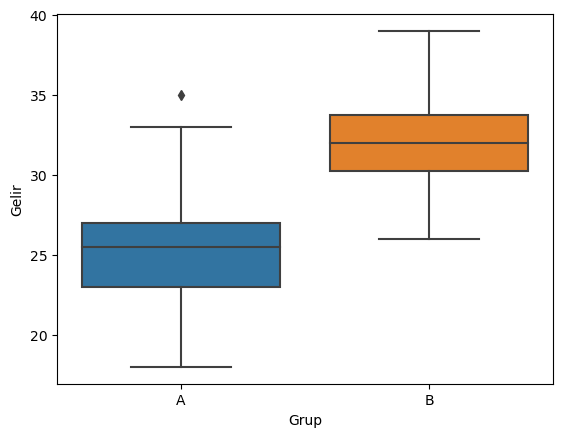

In [58]:
sns.boxplot(x='Grup',y='Gelir',data=AB)
plt.show()

Grafikten de yeni sistemin gelirinin daha iyi olduğu aslında gözükmektedir. Fakat bunun şans eseri mi olup olmadığını istatistiksel olarak kanıtlayarak %95 güvenilirlik ile bunu ispat etmeliyiz.

#### Varsayım kontrolü
- Normallik varsayımı
- Varyans homojenliği varsayımı

In [59]:
# Normallik varsayımı
from scipy.stats import shapiro

Ho: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.

Hı: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır.

In [60]:
shapiro(A_B.A),shapiro(A_B.B)
# görüldüğü üzere p-value değerleri 0.05'ten büyük olduğu için Ho hipotezini reddedemeyiz.

(ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073),
 ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785))

In [61]:
# Varyans homojenliği varsayımı

    
Ho: Varyanslar homojendir.

Hı: Varyanslar homojen değildir.

In [62]:
stats.levene(A_B.A, A_B.B)
# yine görüldüğü üzere p-value değeri 0.05'ten büyük olduğu için Ho hipotezini reddedemeyiz.

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

#### Hipotez Testini Uygulama

In [63]:
stats.ttest_ind(A_B.A, A_B.B, equal_var=True) # equal_var = True, varyans homojenliğinin sağlandığını ifade eder.

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

Hipotez testi sonucunda ortaya çıkan p-value değeri (2.62E-09), alfa değerinden (0.05) küçük olduğu için, Ho; eski sistemin gelirlerinin ortalaması ve yeni sistemin gelirlerinin ortalaması birbirine eşittir hipotezi reddedilir. 

Yani eski sistemin gelirlerinin ortalaması yeni sistemin gelirlerinin ortalamasına eşit değildir. Grafiksek olarak boxplot grafiğindende gördüğümüz gibi yeni sistemin ortalama gelirleri eski sistemin ortalama gelirlerinden daha iyidir.

#### Nonparametrik Bağımsız İki Örneklem Testi
Önceki örnekten gidecek olursak, oradaki varsayımların (normallik, varyans homojenliği) sağlanmadığı durumda mannwhitneyu testi uygulanır.

In [64]:
stats.mannwhitneyu(A_B.A, A_B.B)

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

### Bağımlı İki Örneklem T Testi (AB TESTİ)

Bağımsız İki Örneklem T Testi konusunda takip edilen tüm adımları içerisinde barındırır. En büyük farkı,Bağımlı İki Örneklem T Testinde olaylar birbirine bağımlıdır.

Yani bir şirket çalışanlarına eğitim vermeyi ve buna bağlı olarak aylık satış miktarlarında bir artış olup olmadığını ölçmek istesin. Önce çalışanların eğitimden önceki aylık satış miktarları alınır, daha sonra eğitimden sonraki aylık satış oranlarına bakılır. Bu iki durum birbirine bağlı bir durumdur.

Bir diğer fark ise, Nonparametrik Bağımlı İki Örneklem Testinde wilcoxon testi uygulanır.

### İki Örneklem Oran Testi
İki oran arasında karşılaştırma yapmak için kullanılır. 

Hipotezler:
- Ho: p1=p2 - Hı:p1!=p2
- Ho: p1>=p2 - Hı:p1<p2
- Ho: p1<=p2 - Hı:p1!>p2

Test İstatistiği:

${\displaystyle  Zh=\dfrac{(p1- p2)}{\sqrt{p(1-p)(\dfrac{1}{n1}+\dfrac{1}{n2})}}}$

Varsayımlar:
- n1 ve n2 > 30

-----

<b>İş Uygulaması Problemi: Kullanıcı Arayüzü Deneyi (AB Testi)</b>

Problem:
- Bir şirket, bir web sitesi tasarımında buton renginin kırmızı ve yeşil olması üzerinden, ziyaret edilme oranını tespit etmek istiyor.

Detaylar:
- yeşil butonu 1000 kişi görmüş ve 300 kişi tıklayarak siteyi ziyaret etmiş.
- kırmızı butonu 1100 kişi görmüş ve 250 kişi tıklayarak siteyi ziyaret etmiş.

Hipotezler:
- Ho:p1=p2 (buton renginin kırmızı ya da yeşil olması ziyaret edilme oranında bir farklılık yaratmaz.)
- Hı:p1!=p2 (buton renginin kırmızı ya da yeşil olması ziyaret edilme oranında bir farklılık yaratır.)

In [65]:
from statsmodels.stats.proportion import proportions_ztest

In [66]:
basari_sayisi=np.array([300,250])
gozlem_sayiları=np.array([1000,1100])

In [67]:
proportions_ztest(count=basari_sayisi, nobs=gozlem_sayiları)

(3.7857863233209255, 0.0001532232957772221)

Görüldüğü üzere p-value değeri, 0.05'ten küçük olduğu için Ho hipotezi reddedilir. Yani buton renginin kırmızı ya da yeşil olması ziyaret edilme oranında bir farklılık yaratır. Ve bu farklılık yeşil butonun lehinedir. 

### Varyans Analizi
İki ya da daha fazla grup ortalaması arasında istatistiksel olarak anlamlı farklılık olup olmadığı öğrenilmek istenildiğinde kullanılır.

Hipotezler:
- Ho:mü1=mü2=mü3
- Hı: Eşit değillerdir (en az birisi farklıdır).

Test İstatistiği:

F istatistiği:
${\displaystyle  Fs=\dfrac{MSbetween}{MSwithin}}$
- MSbetween: Gruplar arası ortalama hata.
- MSwithin: Grup içi ortalama hata.

Varsayımlar:
- Gözlemlerin birbirinden bağımsız olması
- Normal dağılım
- Varyans homojenliği

---------

<b>İş Uygulaması Problemi: Anasayfa İçerik Stratejisi Belirlemek</b>

Problem:
- Bir haber sitesinde anasayfada geçirilen süre arttırılmak isteniyor.

Detaylar:
- Bir web sitesi için başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb.
- Sitede uzun zaman geçiren kullanıcıların reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor.
- Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor.
- A: Doğal şekilde gösterim, B: Yönlendirici gösterim, C: İlgi çekici gösterim

Hipotezler:
- Ho:mü1=mü2=mü3 (Her bir yöntemin sonucunda anasayfada geçirilen süreler birbirine eşittir).
- Hı: Eşit değillerdir (en az birisi farklıdır).

In [68]:
from random import randint
from random import seed

In [69]:
seed(13)
A= pd.DataFrame([randint(20,40) for i in range(30)])
B= pd.DataFrame([randint(20,40) for i in range(30)])
C= pd.DataFrame([randint(20,40) for i in range(30)])

In [70]:
dfs=[A,B,C]
ABC=pd.concat(dfs,axis=1)
ABC.columns=['Grup A','Grup B','Grup C']
ABC.head()

,Grup A,Grup B,Grup C
0,28,37,39
1,29,38,28
2,25,33,32
3,40,31,24
4,27,33,38


#### Varsayım kontrolü
- Gözlemlerin birbirinden bağımsız olması
- Normal dağılım
- Varyans homojenliği

In [71]:
# ilk maddenin sağlandığını düşünerek hareket ediyoruz.

Normal dağılım için hipotezler:

Ho: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.

Hı: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır.

In [72]:
# Normal dağılım
shapiro(ABC['Grup A']),shapiro(ABC['Grup B']),shapiro(ABC['Grup C'])
# hepsinin ('Grup A' nında 0.05 olduğunu varsayalım) p-value değerleri 0.05'ten büyük olduğundan Ho hipotezi reddedilemez.

(ShapiroResult(statistic=0.9300902485847473, pvalue=0.04937480017542839),
 ShapiroResult(statistic=0.9506078958511353, pvalue=0.17551490664482117),
 ShapiroResult(statistic=0.9478623270988464, pvalue=0.14813847839832306))

Varyans homojenliği için hipotezler:
    
Ho: Varyanslar homojendir.

Hı: Varyanslar homojen değildir.

In [73]:
# Varyans homojenliği
stats.levene(ABC['Grup A'],ABC['Grup B'],ABC['Grup C'])
# hepsinin p-value değerleri 0.05'ten büyük olduğundan Ho hipotezi reddedilemez. 

LeveneResult(statistic=0.6528066528066537, pvalue=0.5231135302531487)

#### Hipotez Testinin Uygulanması

In [74]:
from scipy.stats import f_oneway

In [75]:
f_oneway(ABC['Grup A'],ABC['Grup B'],ABC['Grup C'])

F_onewayResult(statistic=3.929687780262354, pvalue=0.02323250908245056)

Görüldüğü üzere p-value değeri 0.05'ten küçük olduğu için, Ho: Her bir yöntemin sonucunda anasayfada geçirilen süreler birbirine eşittir hipotezi reddedilir.

In [76]:
# web sitesi için en faydalı yöntemin seçilmesi
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
Grup A,30.0,28.433333,5.679263,20.0,24.00,27.5,32.5,40.0
Grup B,30.0,32.500000,5.157853,23.0,28.25,33.0,37.0,40.0
Grup C,30.0,30.900000,6.104549,20.0,26.25,32.0,35.0,40.0


Görüldüğü üzere 2. grup olan yönlendirici yöntem diğer yöntemlere göre daha başarılır olmuştur.

#### Nonparametrik Hipotez Testi

In [77]:
from scipy.stats import kruskal

In [78]:
kruskal(ABC['Grup A'],ABC['Grup B'],ABC['Grup C'])
# Nonparametrik Hipotez Testine göre yine Ho hipotezi reddedilir.

KruskalResult(statistic=7.351667162928174, pvalue=0.025328283532828268)

### Korelasyon Analizi
Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatiksel bir yöntemdir.

Hipotezler: Korelosyon anlamlılığı testi

ro: Anakitleye ilişkin gösterim için kullanılan sembol.

- Ho:ro=0
- Hı:ro!=0


Test İstatistiği:

${\displaystyle  t=r\sqrt{\dfrac{n-2}{1-r^2}}}$ 

r: Örnek üzerinden elde edilen istatik için kullanılan sembol.

Varsayımlar:
- İki değişken içinde normallik varsayımı
- Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
- Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

-----

<b>İş Uygulaması Problemi: Bahşiş ile Ödenen Hesap Arasındaki İlişkinin İncelenmesi</b>

Problem:
- Bir restorant bahşiş ile ödenen hesap arasındaki ilişkinin incelenmesini istiyor.

Detaylar (Bahşiş(tips) veri seti):
- total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)
- tip: bahşiş
- sex: ücreti ödeyen kişinin cinsiyeti
- smoker: grupta sigara içen var mı?
- day: gün
- time: yemeğin zamanı
- size: grup sayısı

Hipotezler:
- Ho:ro=0 (bahşiş ile ödenen hesap arasında anlamlı bir ilişki yoktur).
- Hı: ro!=0 (bahşiş ile ödenen hesap arasında anlamlı bir ilişki vardır).

In [79]:
tips=sns.load_dataset('tips')
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [80]:
# total_bill'in içerisinde tip de olduğu için saf total_bill değerlerini elde etmek için total_bill'den tip çıkartılmalıdır.

In [81]:
df['total_bill']=df['total_bill']-df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


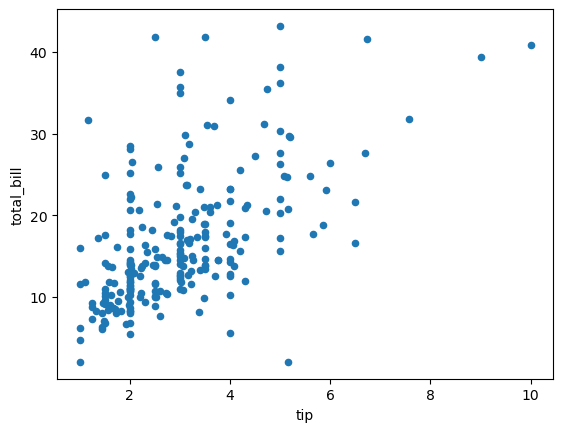

In [82]:
df.plot.scatter("tip","total_bill")
plt.show()
# görüldüğü üzere hesap ile bahşiş arasında pozitif yönlü bir korelasyon bulunmaktadır.

#### Varsayım Kontrolü
- İki değişken içinde normallik varsayımı
- Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
- Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı


In [83]:
# normallik varsayımı
# Normal dağılım için hipotezler:
# Ho: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.
# Hı: Örnek dağılımı ile teorik dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır.
shapiro(df['total_bill']),shapiro(df['tip'])

(ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10),
 ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12))

p-value değerleri 0.05'ten küçük olduğu için Ho hipotezi reddedilir.

In [84]:
# normallik varsyımı sağlanmadı fakat biz sağlanıyormuşçasına diğer testlerimizi de gerçekleştirelim.
# son olarak nonparametrik test ile 2 durumu karşılaştıralım

#### Hipotez Testi Uygulanması

In [87]:
# Korelasyon Katsayısı

# Pearson (Normallik sağlanırsa)
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [88]:
#Spearman (Normallik sağlanmazsa)
df["tip"].corr(df["total_bill"],method="spearman")

0.593691939408997

Her iki korelasyon katsayısı sonuçlarında da ilişkinin yönü pozitif ve şiddeti orta olarak belirlenmiştir.

In [89]:
# Korelasyon Anlamlılığının Testi

# pearson için
from scipy.stats.stats import pearsonr

In [90]:
pearsonr(df["tip"],df["total_bill"])

(0.5766634471096381, 5.018290084948419e-23)

p-value değeri 0.05'ten küçük olduğu için, Ho: bahşiş ile ödenen hesap arasında anlamlı bir ilişki yoktur hipotezi reddedilir.

#### Nonparametrik Hipotez Testi Uygulanması

In [91]:
# spearman için
from scipy.stats.stats import spearmanr

In [92]:
spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

Nonparametrik Hipotez Testinde kullanılan spearman yöntemine göre yine p-value değeri 0.05'ten küçük olduğu için, Ho: bahşiş ile ödenen hesap arasında anlamlı bir ilişki yoktur hipotezi reddedilir.

In [93]:
# kendalltau için
from scipy.stats.stats import kendalltau

In [94]:
kendalltau(df["tip"],df["total_bill"])

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)

Nonparametrik Hipotez Testinde kullanılan kendalltau yöntemine göre yine p-value değeri 0.05'ten küçük olduğu için, Ho: bahşiş ile ödenen hesap arasında anlamlı bir ilişki yoktur hipotezi reddedilir.

Spearman'dan farkı korelasyon şiddeti biraz daha küçüktür.

<b> Sonuç: </b> Gerekli varsayımlar sağlanmadığı için yapılan korelasyon testlerinden en güveniliri Spearman Korelasyon Katsayısı Testidir. Buna göre iki değişken arasında anlamlı bir ilişki olup, ilişkinin yönü pozitif ve orta (0.59) şiddetlidir.